In [1]:
# importing libraries
library(ggplot2)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
df <- read.csv("T:\\MS Data Science\\Second Semester\\Statistical Learning\\water_potability_train.csv")

In [3]:
test_data <-  read.csv("T:\\MS Data Science\\Second Semester\\Statistical Learning\\water_potability_test.csv")

In [4]:
head(test_data)

X,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,id_number
2855,6.903074,206.9225,17947.99,7.048017,NA,601.9852,11.77511,58.17626,4.473887,1
2795,6.166348,210.0866,37922.91,6.760221,NA,217.3583,12.28924,39.97810,4.816304,2
2037,7.276863,165.7980,30396.90,7.835639,281.8969,475.6461,12.32618,83.39989,6.083772,3
1986,6.266800,187.8296,27577.21,9.141597,322.9178,277.0508,13.29025,59.45432,3.652845,4
2437,5.896432,165.1357,23022.17,7.536806,356.7562,401.7409,18.36357,80.12475,4.280793,5
2832,5.089388,147.9953,39659.88,8.424878,NA,498.7009,14.94358,84.25426,3.054045,6


In [24]:
df <- subset(df,select=-X)
head(df)

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
5.782079,200.4048,25366.121,9.270066,NA,525.5330,10.67552,54.08109,5.059362,1
5.736676,180.2909,12683.483,7.907877,423.8763,415.0066,12.39287,83.70705,2.741791,1
4.897692,169.2358,14676.716,8.318607,NA,437.5387,16.21914,81.94781,3.894464,1
6.910765,242.0913,7764.438,8.045870,440.6355,487.9323,18.37680,45.30654,4.340149,1
8.501711,193.9089,21289.180,7.108190,NA,393.1767,13.64324,61.12508,5.612296,1
4.303575,227.0071,7323.302,7.490508,326.6952,412.8964,12.90673,68.74892,2.010537,1


In [6]:
str(df)

'data.frame':	2620 obs. of  11 variables:
 $ X              : int  2757 1580 714 2824 1094 1152 1156 1108 801 2429 ...
 $ ph             : num  5.78 5.74 4.9 6.91 8.5 ...
 $ Hardness       : num  200 180 169 242 194 ...
 $ Solids         : num  25366 12683 14677 7764 21289 ...
 $ Chloramines    : num  9.27 7.91 8.32 8.05 7.11 ...
 $ Sulfate        : num  NA 424 NA 441 NA ...
 $ Conductivity   : num  526 415 438 488 393 ...
 $ Organic_carbon : num  10.7 12.4 16.2 18.4 13.6 ...
 $ Trihalomethanes: num  54.1 83.7 81.9 45.3 61.1 ...
 $ Turbidity      : num  5.06 2.74 3.89 4.34 5.61 ...
 $ Potability     : int  1 1 1 1 1 1 1 1 1 1 ...


In [7]:
#positive class
print(sum(complete_data$Potability==1))
# negative class
print(sum(complete_data$Potability==0))

ERROR: Error in print(sum(complete_data$Potability == 1)): object 'complete_data' not found


In [5]:
# separting each variable
ph <- df$ph
hardness <- df$Hardness
solids <- df$Solids
chloramines <- df$Chloramines
sulfate <- df$Sulfate

In [6]:
# Missing values
# Q1 In which variable is the data missing
# Q2 How much the data is missing?

In [7]:
missing_values <- (apply(df, 2, function(x) sum(is.na(x)))/nrow(df))*100
sort(missing_values[missing_values>0],decreasing=TRUE)

Sulfate              ph Trihalomethanes 
      24.351145       14.923664        4.923664

In [8]:
library(mice)

tempData <- mice(df, m = 5, method = "pmm", seed = 123,print=FALSE)
# tempData only contains the imputed missing values not the all values
# we can take all the values using 'complete' function of mice package

Warning message:
"package 'mice' was built under R version 3.6.3"
Attaching package: 'mice'

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    cbind, rbind



In [9]:
tempData$predictorMatrix

,X,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
X,0,1,1,1,1,1,1,1,1,1,1
ph,1,0,1,1,1,1,1,1,1,1,1
Hardness,1,1,0,1,1,1,1,1,1,1,1
Solids,1,1,1,0,1,1,1,1,1,1,1
Chloramines,1,1,1,1,0,1,1,1,1,1,1
Sulfate,1,1,1,1,1,0,1,1,1,1,1
Conductivity,1,1,1,1,1,1,0,1,1,1,1
Organic_carbon,1,1,1,1,1,1,1,0,1,1,1
Trihalomethanes,1,1,1,1,1,1,1,1,0,1,1
Turbidity,1,1,1,1,1,1,1,1,1,0,1


In [10]:
tempData$meth

X              ph        Hardness          Solids     Chloramines 
             ""           "pmm"              ""              ""              "" 
        Sulfate    Conductivity  Organic_carbon Trihalomethanes       Turbidity 
          "pmm"              ""              ""           "pmm"              "" 
     Potability 
             ""

In [11]:
complete_data <- complete(tempData, 1)
head(complete_data)

X,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2757,5.782079,200.4048,25366.121,9.270066,234.2856,525.5330,10.67552,54.08109,5.059362,1
1580,5.736676,180.2909,12683.483,7.907877,423.8763,415.0066,12.39287,83.70705,2.741791,1
714,4.897692,169.2358,14676.716,8.318607,291.1991,437.5387,16.21914,81.94781,3.894464,1
2824,6.910765,242.0913,7764.438,8.045870,440.6355,487.9323,18.37680,45.30654,4.340149,1
1094,8.501711,193.9089,21289.180,7.108190,320.2601,393.1767,13.64324,61.12508,5.612296,1
1152,4.303575,227.0071,7323.302,7.490508,326.6952,412.8964,12.90673,68.74892,2.010537,1


In [12]:
# Now we can see all the values imputed
missing_values <- (apply(complete_data, 2, function(x) sum(is.na(x)))/nrow(df))*100
missing_values

X              ph        Hardness          Solids     Chloramines 
              0               0               0               0               0 
        Sulfate    Conductivity  Organic_carbon Trihalomethanes       Turbidity 
              0               0               0               0               0 
     Potability 
              0

In [175]:
# 
nrow(tempData$imp$Trihalomethanes)

[1] 129

In [31]:
# Analysis, how similar the imputed data with original data


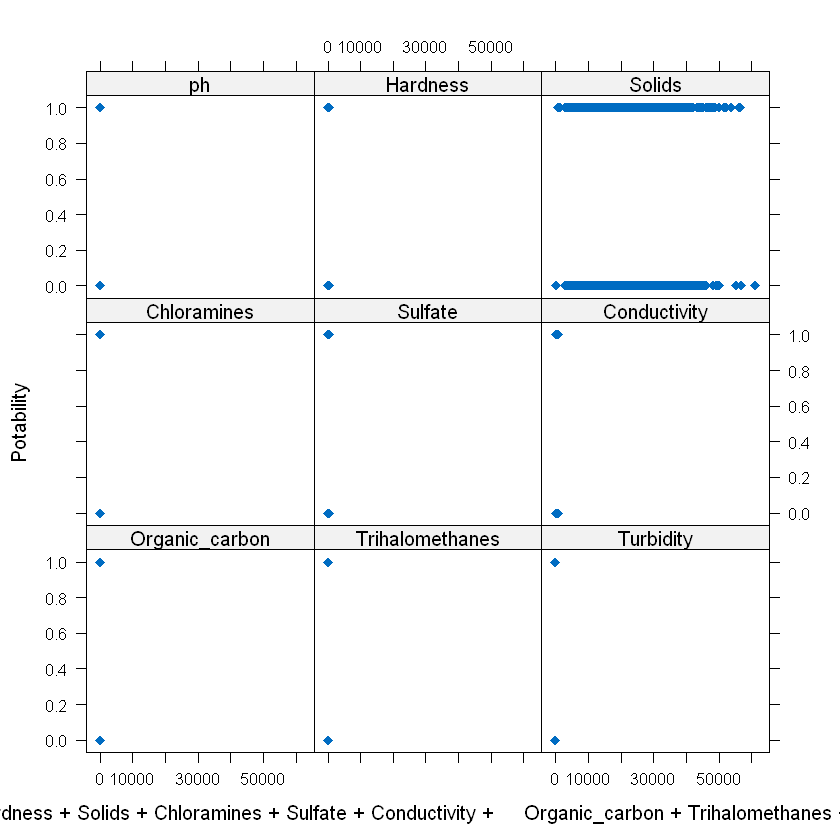

In [32]:
xyplot(tempData,Potability ~ ph + Hardness + Solids + Chloramines + Sulfate + Conductivity + Organic_carbon + Trihalomethanes + Turbidity ,pch=18,cex=1)

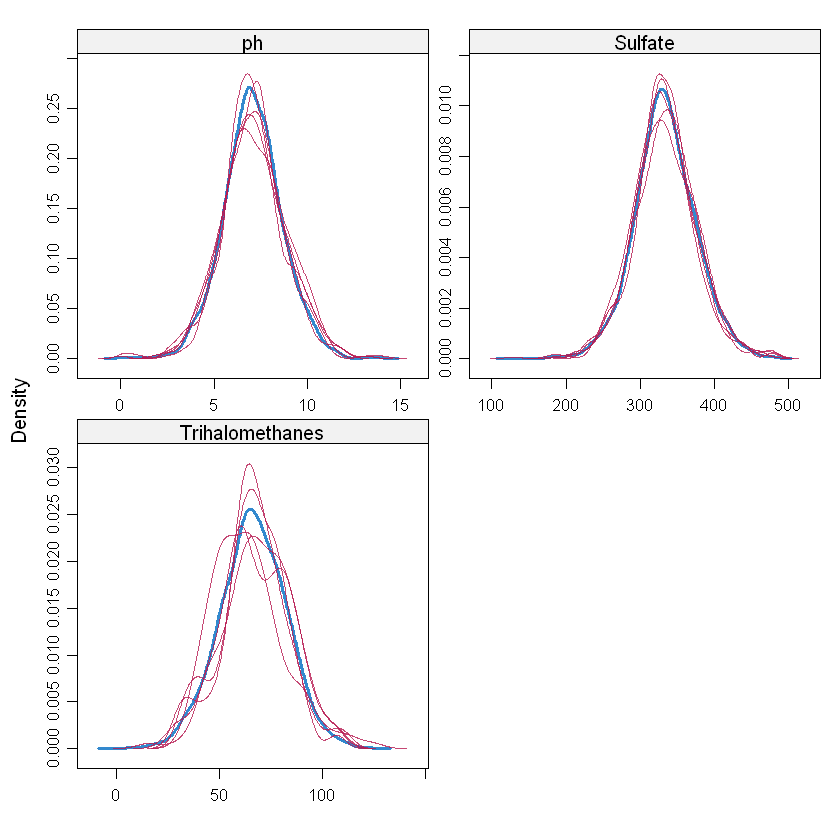

In [23]:
densityplot(tempData)

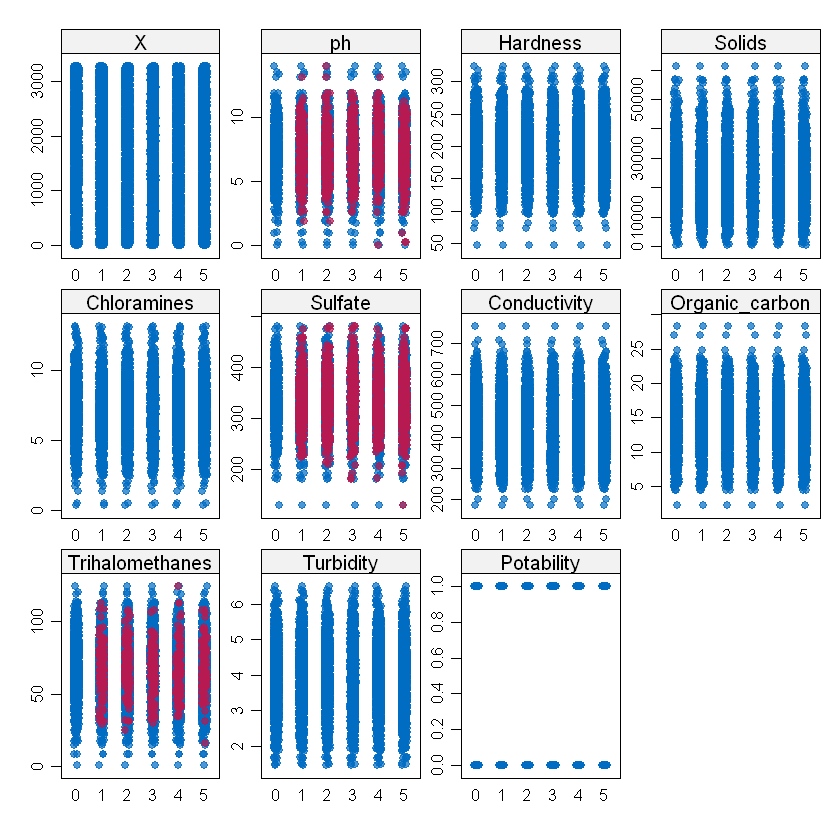

In [24]:
# from striplots we can see the imputed values are plausible
stripplot(tempData, pch = 20, cex = 1.2)

In [ ]:
# Now closes the missing values topics, just write what you concluded

In [32]:
models <- with(imputed_data, lm(Potability ~ ph + Hardness + Solids + Chloramines + Sulfate + Conductivity + Organic_carbon + Trihalomethanes + Turbidity))

In [21]:
pooled <- pool(models)
summary(pooled)

term,estimate,std.error,statistic,df,p.value
(Intercept),3.386403e-01,1.593537e-01,2.12508558,799.89193,0.03388543
ph,-4.824901e-04,6.674495e-03,-0.07228864,85.33814,0.94254136
Hardness,5.248777e-05,2.926765e-04,0.17933714,2512.38085,0.85768745
Solids,1.873298e-06,1.122647e-06,1.66864314,2509.08094,0.09531289
Chloramines,6.528093e-03,6.022745e-03,1.08390655,2605.52786,0.27850652
Sulfate,-1.047016e-05,2.709108e-04,-0.03864798,59.64706,0.96930012
Conductivity,-2.095267e-05,1.181438e-04,-0.17734889,2607.06347,0.85924813
Organic_carbon,-4.899176e-03,2.892105e-03,-1.69398291,2605.92108,0.09038803
Trihalomethanes,3.636768e-04,6.054741e-04,0.60064787,792.46082,0.54824629
Turbidity,3.702826e-03,1.222677e-02,0.30284567,2606.93239,0.76203164


In [ ]:
# should we don't need to remove some of the variables instead of imputing 

,X,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,Trihalomethanes,ph,Sulfate,
1591,1,1,1,1,1,1,1,1,1,1,1,0
529,1,1,1,1,1,1,1,1,1,1,0,1
291,1,1,1,1,1,1,1,1,1,0,1,1
80,1,1,1,1,1,1,1,1,1,0,0,2
85,1,1,1,1,1,1,1,1,0,1,1,1
24,1,1,1,1,1,1,1,1,0,1,0,2
15,1,1,1,1,1,1,1,1,0,0,1,2
5,1,1,1,1,1,1,1,1,0,0,0,3
,0,0,0,0,0,0,0,0,129,391,638,1158


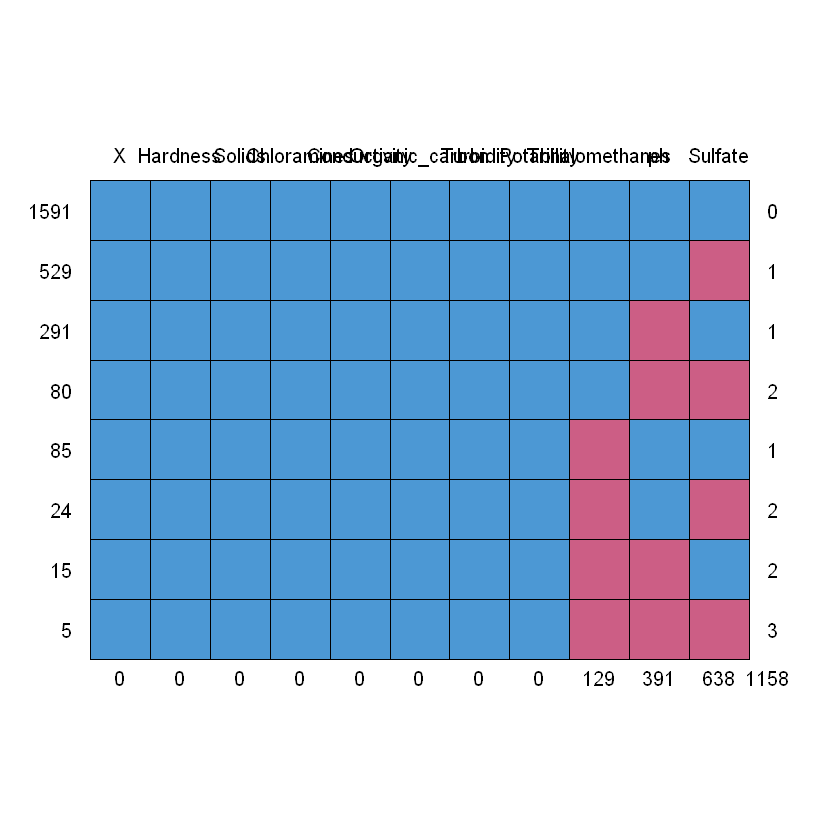

In [40]:
md.pattern(df)

In [ ]:
# Next Step

In [7]:
summary(ph)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   6.082   7.038   7.082   8.070  14.000     391 

In [8]:
# Missing Values
ph_mis_val <-sum(is.na(ph))
ph_mis_val
sum(is.na(sulfate))

[1] 391

[1] 638

In [ ]:
# Analysis of ph

In [53]:
summary(complete_data$ph)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   6.081   7.042   7.101   8.113  14.000 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


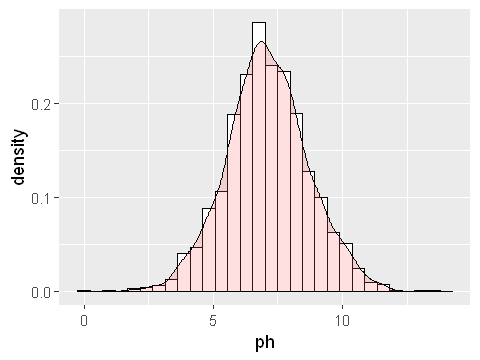

In [118]:

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(complete_data,aes(x=ph))+geom_histogram(aes(y=..density..),color="black",fill="white")+geom_density(alpha=.2, fill="#FF6666")

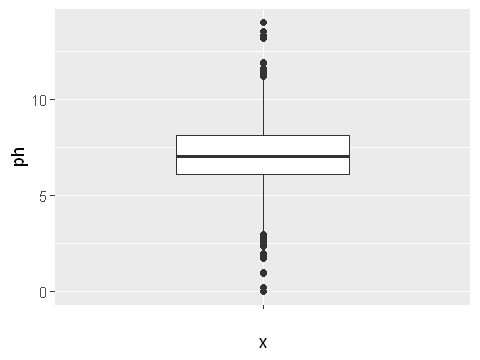

In [120]:
#ggplot(df,aes(x=sulfate))+geom_boxplot(stat="identity")
#ggplot(df, aes(x = Conductivity)) +geom_boxplot()
#boxplot(df$ph)
options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(complete_data, aes(x="",y=ph)) + geom_boxplot(width = 0.5)

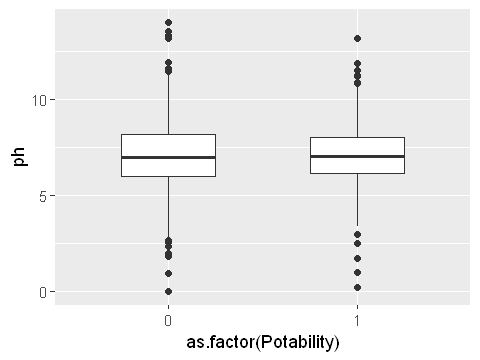

In [211]:
options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(complete_data, aes(x=as.factor(Potability),y=ph)) + geom_boxplot(width = 0.5)

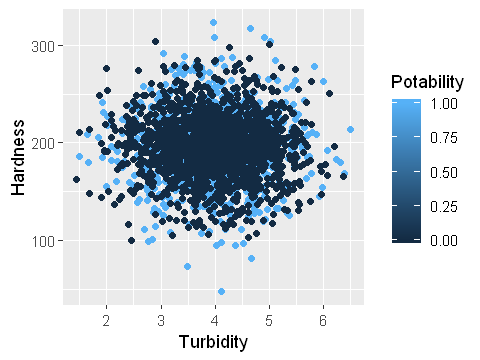

In [228]:
ggplot(data = complete_data, aes(x=Turbidity, y = Hardness, color = Potability)) + geom_point()


In [232]:
library(corrplot)

# Compute correlation matrix
cor_mat <- cor(complete_data[c("ph", "Hardness" , "Solids"  ,"Chloramines"  ,"Sulfate" , "Conductivity" ," Organic_carbon ", "Trihalomethanes" ," Turbidity")])

# Create correlation plot
corrplot(cor_mat, method = "circle")


ERROR: Error in `[.data.frame`(complete_data, c("ph", "Hardness", "Solids", "Chloramines", : undefined columns selected


In [240]:
library(corrplot)

data_to_scale <- complete_data[,1:(ncol(complete_data)-1)]
scaled_data <- scale(data_to_scale)
# Compute correlation matrix
cor_mat <- cor(scaled_data[c("ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity")])

# Create correlation plot
corrplot(cor_mat, method = "circle")


ERROR: Error in cor(scaled_data[c("ph", "Hardness", "Solids", "Chloramines", : supply both 'x' and 'y' or a matrix-like 'x'


In [235]:

cont_vars <- complete_data[,c("X", "ph", "Hardness", "Solids", "Chloramines", 
                              "Sulfate", "Conductivity", "Organic_carbon", 
                              "Trihalomethanes")]

# Use GGally's ggpairs function to create a scatter plot matrix with the categorical variable
ggpairs(cont_vars, aes(color = as.factor(Potability)))

ERROR: Error in library(GGally): there is no package called 'GGally'


In [128]:
ph_outliers <- boxplot.stats(complete_data$ph)$out
#ph_outliers
# 
complete_data <- complete_data
# A problem comes, i am going to remove the outliers but how can i know which is outliers 
# as in classification  

[1]  2.9744294 11.2445071  2.5381158  0.9899122 11.4910109 11.8980780
 [7] 11.1802845  0.2274991  1.7570371 11.4910109 13.1754017 13.3498886
[13] 11.1806947 11.2354260 11.5348805 14.0000000  2.6908312 11.4497393
[19]  2.8035631 11.5631691  0.9755780  1.9853834  2.9251743 11.1802845
[25] 11.3905431  2.9454691 11.6211401 13.5412402  2.6120359  2.5581028
[31] 13.1754017  2.9251743  2.5692436  1.8445384  1.8445384  0.0000000
[37] 11.9077398 11.1806947 11.4968589  2.3767681  2.6908312 11.5687680
[43]  2.5581028 11.4967025 11.2678284

In [201]:
# here from very brief
ph_outliers<-complete_data$ph[(complete_data$ph<2 & complete_data$Potability==1) | (complete_data$ph>9 & complete_data$Potability==1) ]
ph_outliers

ERROR: Error in complete_data$ph: $ operator is invalid for atomic vectors


In [180]:
nrow(complete_data)

[1] 2620

In [209]:
# now removing all the outliers from dataset 
# that is, the value which has more acidic but still potable 
# and more basic but still potable
# is there any other value needed to be removed?
# need to think
filtered_data <- subset(complete_data,!((ph <= 2 & Potability==1) |(ph >=9  & Potability==1)))



nrow(filtered_data)

[1] 2508

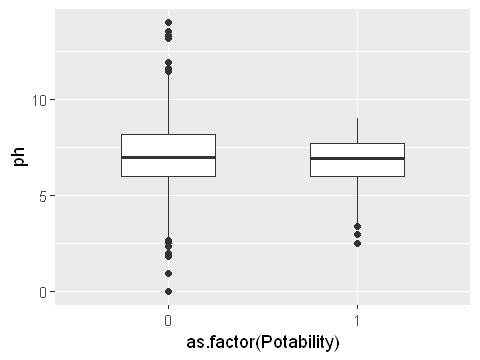

In [212]:
options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(filtered_data, aes(x=as.factor(Potability),y=ph)) + geom_boxplot(width = 0.5)

In [214]:
chisq.test(filtered_data$Potability,filtered_data$ph)

Warning message in chisq.test(filtered_data$Potability, filtered_data$ph):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  filtered_data$Potability and filtered_data$ph
X-squared = 2162.9, df = 2162, p-value = 0.4905


In [160]:
fisher.test(complete_data$Potability,complete_data$ph)

ERROR: Error in fisher.test(complete_data$Potability, complete_data$ph): FEXACT error 40.
Out of workspace.


In [162]:
model <- aov(ph ~ Potability, data = complete_data)
summary(model)

              Df Sum Sq Mean Sq F value Pr(>F)
Potability     1      0  0.1217   0.046  0.831
Residuals   2618   6958  2.6578               

In [241]:

sum(complete_data$Potability==1)
sum(complete_data$Potability==0)

[1] 1022

[1] 1598

In [265]:
# dividing dataset into potable and non potable set

potable_data <- subset(complete_data, Potability==1 )
nonpotable_data <- subset(complete_data, Potability==0)
nrow(potable_water)

[1] 1022

In [ ]:
# my thoughts ph of 1 is very harmful
# hence it should have correlation between ph and potability#o

In [251]:
potable_ph_mean <- mean(potable_data$ph)
potable_ph_sd <- sd(potable_data$ph)
nonpotable_ph_mean <- mean(nonpotable_data$ph)
nonpotable_ph_sd <- sd(nonpotable_data$ph)

In [254]:
cat("Potable water pH mean:", potable_ph_mean, "\n")
cat("Potable water pH SD:", potable_ph_sd, "\n")
cat("Non-potable water pH mean:", nonpotable_ph_mean, "\n")
cat("Non-potable water pH SD:", nonpotable_ph_sd, "\n")
t.test(potable_data$ph, nonpotable_data$ph)

Potable water pH mean: 7.10908 
Potable water pH SD: 1.498928 
Non-potable water pH mean: 7.095106 
Non-potable water pH SD: 1.708974 



	Welch Two Sample t-test

data:  potable_data$ph and nonpotable_data$ph
t = 0.22022, df = 2374.9, p-value = 0.8257
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1104523  0.1383993
sample estimates:
mean of x mean of y 
 7.109080  7.095106 


In [283]:
#no such significant correlation b/w ph and potability
# Q, it might be possible when we remove unusal values from data
# I mean there is such values which is even has ph value tend to close to 1 but still potable
# we are removing such values
filtered_data <- subset(complete_data,!((ph <= 4 & Potability==1) |(ph >=9.5  & Potability==1)))
potable_filter_ph <- subset(filtered_data, Potability==1)
non_potable_filter_ph <- subset(filtered_data,Potability==0)
nrow(potable_filter_ph)

[1] 943

In [284]:
# now checking in the case of filtered data
# apparently statistics should not changed significantly
potable_ph_mean <- mean(potable_filter_ph$ph)
potable_ph_sd <- sd(potable_filter_ph$ph)
nonpotable_ph_mean <- mean(non_potable_filter_ph$ph)
nonpotable_ph_sd <- sd(non_potable_filter_ph$ph)

In [285]:
cat("Potable water pH mean:", potable_ph_mean, "\n")
cat("Potable water pH SD:", potable_ph_sd, "\n")
cat("Non-potable water pH mean:", nonpotable_ph_mean, "\n")
cat("Non-potable water pH SD:", nonpotable_ph_sd, "\n")
t.test(potable_data$ph, nonpotable_data$ph)

Potable water pH mean: 6.997655 
Potable water pH SD: 1.201767 
Non-potable water pH mean: 7.095106 
Non-potable water pH SD: 1.708974 



	Welch Two Sample t-test

data:  potable_data$ph and nonpotable_data$ph
t = 0.22022, df = 2374.9, p-value = 0.8257
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1104523  0.1383993
sample estimates:
mean of x mean of y 
 7.109080  7.095106 


In [ ]:
# yield the different result as expected early
# our intuition is suggesting that ph should be highly correlated with the data


In [287]:
correlation <- cor(complete_data$ph, complete_data$Potability, method = "pearson")
correlation

[1] 0.004182326

In [289]:
correlation <- cor(complete_data$ph, complete_data$Potability, method = "spearman")
correlation

[1] 0.00848585

In [ ]:
# There is no correlation between ph and potability
# Is it mean that it will has not any effect in predicting the potability?
# 

In [293]:
# let's do further analysis
model <- glm(Potability ~ sulfate, data = df)
summary(model)


Call:
glm(formula = Potability ~ sulfate, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.4194  -0.3971  -0.3891   0.6016   0.6319  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.4578544  0.0888608   5.152 2.83e-07 ***
sulfate     -0.0001865  0.0002640  -0.706     0.48    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.2392735)

    Null deviance: 473.88  on 1981  degrees of freedom
Residual deviance: 473.76  on 1980  degrees of freedom
  (638 observations deleted due to missingness)
AIC: 2794.1

Number of Fisher Scoring iterations: 2


In [258]:
potable_tur_mean <- mean(potable_data$Turbidity)
potable_tur_sd <- sd(potable_data$Turbidity)
nonpotable_tur_mean <- mean(nonpotable_data$Turbidity)
nonpotable_tur_sd <- sd(nonpotable_data$Turbidity)

In [260]:
cat("Potable water Tur mean:", potable_tur_mean, "\n")
cat("Potable water Tur SD:", potable_tur_sd, "\n")
cat("Non-potable water Tur mean:", nonpotable_tur_mean, "\n")
cat("Non-potable water Tur SD:", nonpotable_tur_sd, "\n")
t.test(potable_data$Turbidity, nonpotable_data$Turbiduty)

Potable water Tur mean: 3.977559 
Potable water Tur SD: 0.7829277 
Non-potable water Tur mean: 3.96473 
Non-potable water Tur SD: 0.781078 



	One Sample t-test

data:  potable_data$Turbidity
t = 162.41, df = 1021, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 3.929501 4.025616
sample estimates:
mean of x 
 3.977559 


In [5]:
library(keras)
library(tensorflow)

In [1]:

library(reticulate)

In [1]:
remove.packages("keras")

Removing package from 'C:/Users/usama/.conda/envs/R/Lib/R/library'
(as 'lib' is unspecified)


ERROR: Error in find.package(pkgs, lib): there is no package called 'keras'


In [3]:
install.packages("reticulate")


  There is a binary version available but the source version is later:
           binary source needs_compilation
reticulate   1.20   1.28              TRUE

  Binaries will be installed
package 'reticulate' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'reticulate'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\usama\.conda\envs\R\Lib\R\library\00LOCK\reticulate\libs\x64\reticulate.dll to C:\Users\usama\.conda\envs\R\Lib\R\library\reticulate\libs\x64\reticulate.dll: Permission denied"Warning message:
"restored 'reticulate'"


The downloaded binary packages are in
	C:\Users\usama\AppData\Local\Temp\RtmpeIoUpP\downloaded_packages


In [7]:
library(keras)
keras::k_clear_session()
library(tensorflow)
tensorflow::tf$keras$backend$clear_session()
detach("package:keras", unload = TRUE)
detach("package:tensorflow", unload = TRUE)


ERROR: Error: Python module tensorflow.python.keras was not found.

Detected Python configuration:

python:         T:\Installed Softwares\Anaconda Installed\python.exe
libpython:      T:/Installed Softwares/Anaconda Installed/python39.dll
pythonhome:     T:\Installed Softwares\Anaconda Installed
version:        3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Architecture:   64bit
numpy:          T:\Installed Softwares\Anaconda Installed\lib\site-packages\numpy
numpy_version:  1.21.5
tensorflow:     [NOT FOUND]

python versions found: 
 C:\Users\usama\.conda\envs\r\python.exe
 T:\Installed Softwares\Anaconda Installed\python.exe
 C:\Users\usama\.conda\envs\R\python.exe
 T:\Installed Softwares\Anaconda Installed\envs\opencv4\python.exe




In [41]:
install.packages(c("keras", "tensorflow"), type = "binary")



  There are binary versions available (and will be installed) but the
  source versions are later:
           binary source
keras       2.4.0 2.11.1
tensorflow  2.4.0 2.11.0



Warning message:
"packages 'keras', 'tensorflow' are in use and will not be installed"

In [5]:
#install.packages("tensorflow")
#install.packages("keras")

In [6]:
x_train <- complete_data[,-ncol(complete_data)]
#x_train <- as.matrix(x_train)
y_train <- test_data$Potability


ERROR: Error in eval(expr, envir, enclos): object 'complete_data' not found


In [42]:
#Sys.setenv(RETICULATE_PYTHON = "T:/Installed Softwares/Anaconda Installed/python.exe")
#use_python("reticulate")
#system("T:\\Installed Softwares\\Anaconda Installed\\python.exe --3.9.12")

In [9]:
tf_version()

NULL

In [11]:
reticulate::py_install("tensorflow")

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:\Users\usama\.conda\envs\rstudio/python.exe": The system cannot find the file specified"

ERROR: Error: Error 1 occurred installing packages into conda environment r-reticulate


In [3]:
reticulate::py_module_available("tensorflow")


[1] FALSE

In [2]:
reticulate::py_discover_config()

python:         T:\Installed Softwares\Anaconda Installed\python.exe
libpython:      T:/Installed Softwares/Anaconda Installed/python39.dll
pythonhome:     T:\Installed Softwares\Anaconda Installed
version:        3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Architecture:   64bit
numpy:          T:\Installed Softwares\Anaconda Installed\lib\site-packages\numpy
numpy_version:  1.21.5

python versions found: 
 C:\Users\usama\.conda\envs\r\python.exe
 T:\Installed Softwares\Anaconda Installed\python.exe

In [4]:
#reticulate::py_install("tensorflow")
use_backend("tensorflow")

In [5]:
library(keras)
library(tensorflow)
library(reticulate)
#use_python("T:/Installed Softwares/Anaconda Installed/python.exe")
use_backend("tensorflow")
model <- keras_model_sequential()
model %>%
  layer_dense(units = 64, activation = "relu", input_shape = c(10)) %>%
  layer_dense(units = 32, activation = "relu") %>%
  layer_dense(units = 1, activation = "sigmoid")

ERROR: Error: Python module tensorflow.keras was not found.

Detected Python configuration:

python:         T:/Installed Softwares/Anaconda Installed/python.exe
libpython:      T:/Installed Softwares/Anaconda Installed/python39.dll
pythonhome:     T:\Installed Softwares\Anaconda Installed
version:        3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Architecture:   64bit
numpy:          T:\Installed Softwares\Anaconda Installed\lib\site-packages\numpy
numpy_version:  1.21.5
tensorflow:     [NOT FOUND]

python versions found: 
 T:/Installed Softwares/Anaconda Installed/python.exe
 C:\Users\usama\AppData\Local\r-miniconda\envs\r-reticulate\python.exe
 T:\Installed Softwares\Anaconda Installed\python.exe
 C:\Users\usama\.conda\envs\R\python.exe
 C:\Users\usama\AppData\Local\r-miniconda\python.exe
 T:\Installed Softwares\Anaconda Installed\envs\opencv4\python.exe




In [6]:
reticulate::py_install("tensorflow==2.6.0")

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:\Users\usama\.conda\envs\rstudio/python.exe": The system cannot find the file specified"

ERROR: Error: Error 1 occurred installing packages into conda environment r-reticulate


In [7]:
tf$version$tensorflow


ERROR: Error: Installation of TensorFlow not found.

Python environments searched for 'tensorflow' package:
 T:\Installed Softwares\Anaconda Installed\python.exe
 C:\Users\usama\AppData\Local\r-miniconda\envs\r-reticulate\python.exe
 T:\Installed Softwares\Anaconda Installed\python.exe
 C:\Users\usama\.conda\envs\R\python.exe
 C:\Users\usama\AppData\Local\r-miniconda\python.exe
 T:\Installed Softwares\Anaconda Installed\envs\opencv4\python.exe

You can install TensorFlow using the install_tensorflow() function.



In [8]:

modnn <- keras_model_sequential() %>%
     layer_dense(units = 50, activation = "relu", 
        input_shape = ncol(x)) %>%
     layer_dense(units = 1)

ERROR: Error: Python module tensorflow.keras was not found.

Detected Python configuration:

python:         T:/Installed Softwares/Anaconda Installed/python.exe
libpython:      T:/Installed Softwares/Anaconda Installed/python39.dll
pythonhome:     T:\Installed Softwares\Anaconda Installed
version:        3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Architecture:   64bit
numpy:          T:\Installed Softwares\Anaconda Installed\lib\site-packages\numpy
numpy_version:  1.21.5
tensorflow:     [NOT FOUND]

NOTE: Python version was forced by RETICULATE_PYTHON




In [46]:
df$keras

NULL

ERROR: Error in install_tensorflow(): could not find function "install_tensorflow"


In [299]:
summary(Neural_model)

                    Length Class      Mode    
call                    3  -none-     call    
response             2620  -none-     numeric 
covariate           26200  -none-     numeric 
model.list              2  -none-     list    
err.fct                 1  -none-     function
act.fct                 1  -none-     function
linear.output           1  -none-     logical 
data                   11  data.frame list    
exclude                 0  -none-     NULL    
net.result              1  -none-     list    
weights                 1  -none-     list    
generalized.weights     1  -none-     list    
startweights            1  -none-     list    
result.matrix          16  -none-     numeric 

In [308]:
predictions <- compute(neural_model,test_data)$net_result
predictions

NULL